<a href="https://colab.research.google.com/github/ELENAZAZA/Formal-method-project/blob/main/Smarthome_process_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# This is a sample Python script.

# Press Maiusc+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.


    #Use a breakpoint in the code line below to debug your script.


# Press the green button in the gutter to run the script.
import pandas
import pm4py
import os

from matplotlib import pyplot as plt
from pm4py.objects.conversion.log import converter as log_converter
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
#from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.petri_net import visualizer as pt_visualiser
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.sna import visualizer as sna_visualiser
from pm4py.algo.organizational_mining.sna import algorithm as sna_factory
import seaborn as sns
import pandas as pd

In [37]:
log = pandas.read_csv('/content/drive/MyDrive/petriNET/dataset.CSV', sep=';', header=0)
d_log = pm4py.format_dataframe(log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
#d_event_log.rename(columns={'case ID': 'case:concept:name', 'activity': 'concept:name' ,'timestamp': 'time:timestamp'}, inplace=True)
    # Convert to log format
#log = log_converter.apply(d_event_log)
#filtered_log = pm4py.filter_variants_top_k(log, 3)
log = pm4py.convert_to_event_log(d_log)


<ipython-input-37-43b966482afb>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  d_log = pm4py.format_dataframe(log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

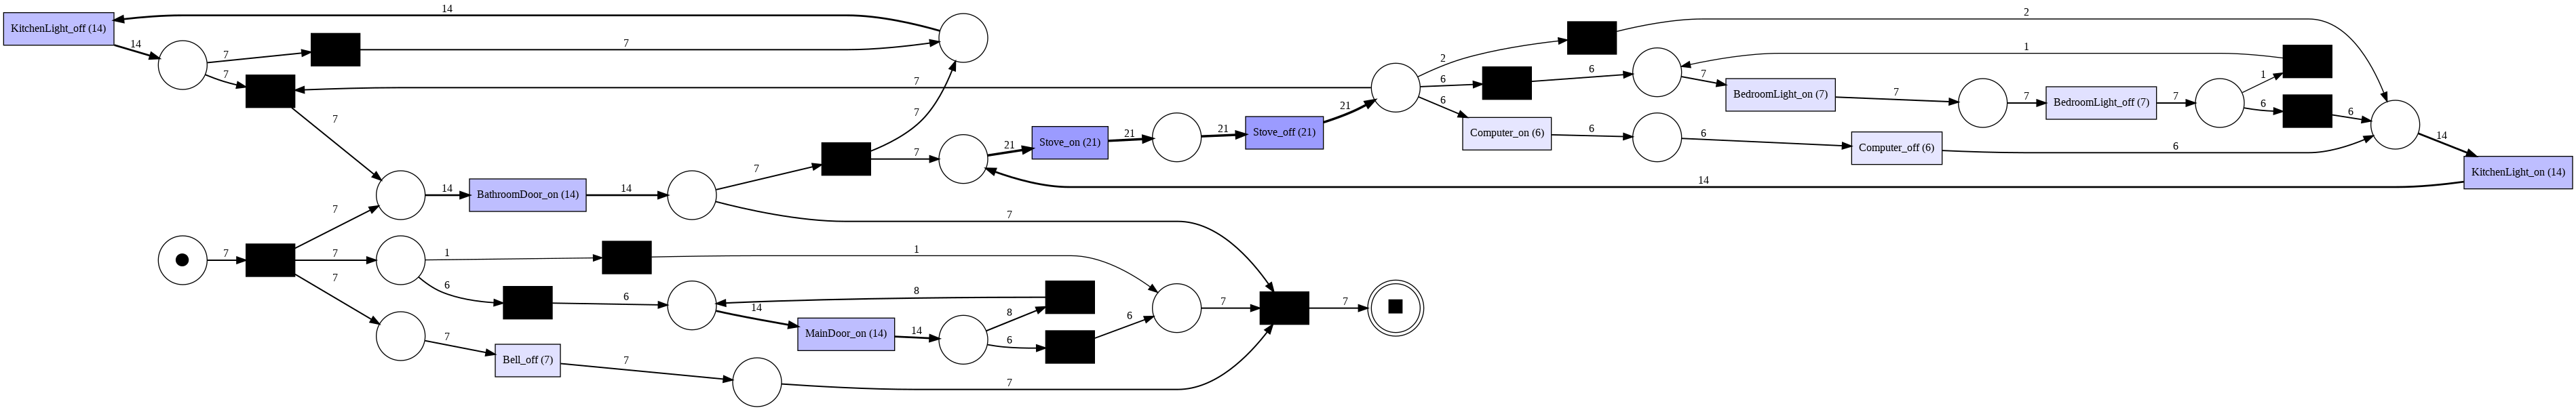

In [38]:
net, im, fm =pm4py.discover_petri_net_inductive(log)
pm4py.save_vis_petri_net(net, im, fm, 'petri_net.png')

graph_visualisation = pt_visualiser.apply(net, im, fm, variant=pt_visualiser.Variants.FREQUENCY, log=log)
pt_visualiser.view(graph_visualisation)
pt_visualiser.save(graph_visualisation, 'PetriNet.png')

In [39]:

replayed_traces = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
print(replayed_traces)

replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

[{'trace_is_fit': True, 'trace_fitness': 1.0, 'activated_transitions': [(tau_1, None), (init_loop_8, None), (b10930a3-1907-4de1-bd0f-44a5670d4859, 'MainDoor_on'), (501dceda-eba8-460e-8968-d8b4917e3fa7, 'Bell_off'), (749274bd-519f-46bc-b991-9a30cdbc0bdb, 'BathroomDoor_on'), (tauSplit_14, None), (b02edd47-e361-4782-b8bc-8062851ce32a, 'Stove_on'), (724865c8-3efe-4ef3-94f6-48eaf876cd3a, 'Stove_off'), (skip_22, None), (5838c0b9-3d36-43f4-a284-80c048ab1443, 'KitchenLight_on'), (b02edd47-e361-4782-b8bc-8062851ce32a, 'Stove_on'), (724865c8-3efe-4ef3-94f6-48eaf876cd3a, 'Stove_off'), (56dab8b4-6000-4d61-a733-50c01b9d3061, 'KitchenLight_off'), (skip_22, None), (5838c0b9-3d36-43f4-a284-80c048ab1443, 'KitchenLight_on'), (b02edd47-e361-4782-b8bc-8062851ce32a, 'Stove_on'), (724865c8-3efe-4ef3-94f6-48eaf876cd3a, 'Stove_off'), (skip_10, None), (b10930a3-1907-4de1-bd0f-44a5670d4859, 'MainDoor_on'), (skip_10, None), (b10930a3-1907-4de1-bd0f-44a5670d4859, 'MainDoor_on'), (skip_18, None), (56dab8b4-6000-4d

In [40]:
wrong_log = pandas.read_csv('/content/drive/MyDrive/petriNET/dataset_problems.CSV', sep=';', header=0)
dw_log = pm4py.format_dataframe(wrong_log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
#d_event_log.rename(columns={'case ID': 'case:concept:name', 'activity': 'concept:name' ,'timestamp': 'time:timestamp'}, inplace=True)
    # Convert to log format
#log = log_converter.apply(d_event_log)
#filtered_log = pm4py.filter_variants_top_k(log, 3)
logw = pm4py.convert_to_event_log(dw_log)

<ipython-input-40-e4ff33168034>:2: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dw_log = pm4py.format_dataframe(wrong_log, case_id='caseID', activity_key='activity', timestamp_key='timestamp')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [41]:
netw, imw, fmw =pm4py.discover_petri_net_inductive(logw)


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

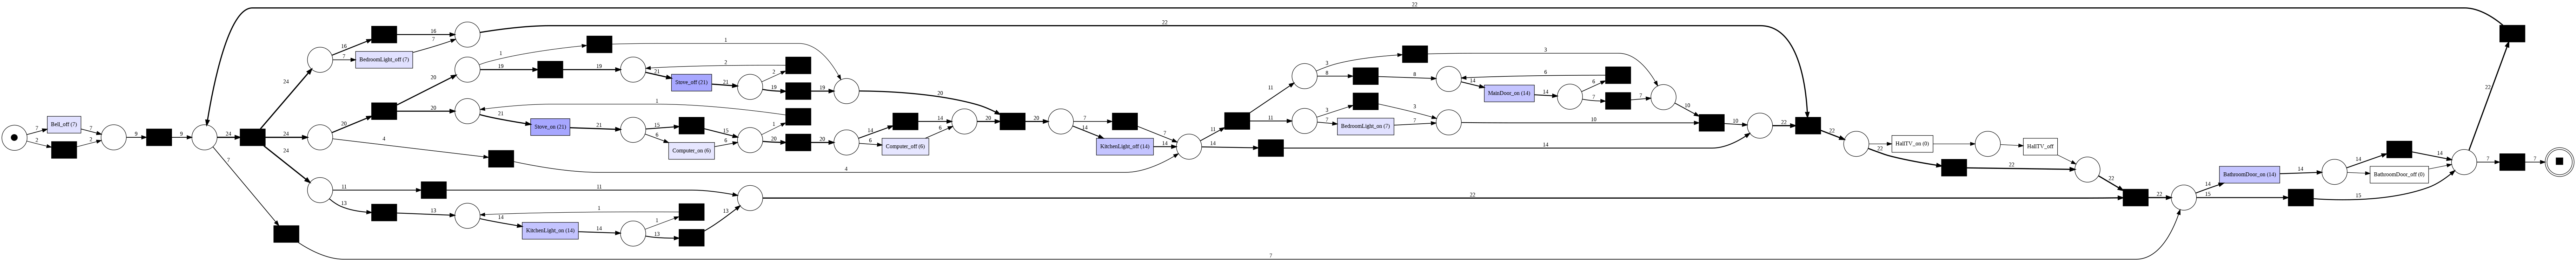

In [42]:
pm4py.save_vis_petri_net(netw, imw, fmw, 'petri_netw.png')

graph_visualisation = pt_visualiser.apply(netw, imw, fmw, variant=pt_visualiser.Variants.FREQUENCY, log=log)
pt_visualiser.view(graph_visualisation)
pt_visualiser.save(graph_visualisation, 'PetriNetw.png')

In [130]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

parameters_tbr = {token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.DISABLE_VARIANTS: True, token_based_replay.Variants.TOKEN_REPLAY.value.Parameters.ENABLE_PLTR_FITNESS: True}
replayed_traces, place_fitness, trans_fitness, unwanted_activities = token_based_replay.apply(log, netw, imw, fmw, parameters=parameters_tbr)


replaying log with TBR, completed variants ::   0%|          | 0/7 [00:00<?, ?it/s]

## **Conformance Checking**

In [124]:
i=0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']

for i in range (len(replayed_traces)):
  print(day[i])
  if( (replayed_traces[i]['trace_is_fit']) == True ):
      print("L'attività si adatta al modello.")
  else:
      print("L'attività non si adatta al modello.")
  #print("Trace fitness: ", end="")
  print("Trace fitness: ",  end="")
  print("{:.3f}".format(replayed_traces[i]['trace_fitness']))
  print(" \n")

Lunedi
L'attività non si adatta al modello.
Trace fitness: 0.975
 

Martedi
L'attività si adatta al modello.
Trace fitness: 1.000
 

Mercoledi
L'attività si adatta al modello.
Trace fitness: 1.000
 

Giovedi
L'attività si adatta al modello.
Trace fitness: 1.000
 

Venerdi
L'attività si adatta al modello.
Trace fitness: 1.000
 

Sabato
L'attività non si adatta al modello.
Trace fitness: 0.965
 

Domenica
L'attività si adatta al modello.
Trace fitness: 1.000
 



In [125]:
print("Transizioni del modello attivate dal dataset sbagliato:\n")

#per contare transizioni non nulle
i=0
j=0
contatore = 0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']
transizioni = list()
for i in range (len(replayed_traces)):
  for j in range (len(replayed_traces[i]['activated_transitions'])):
    if(replayed_traces[i]['activated_transitions'][j].label != None):
      contatore += 1
  transizioni.append(contatore)
  contatore = 0
      
#per stampare transizioni non nulle
contatore = 0

for i in range (len(replayed_traces)):
  print(day[i])
  for j in range (len(replayed_traces[i]['activated_transitions'])):
    if(replayed_traces[i]['activated_transitions'][j].label != None):
      print(replayed_traces[i]['activated_transitions'][j].label, end="")
      contatore += 1
      if(contatore != transizioni[i]):
        print(" -> ", end="")
  print("\n")
  contatore = 0

Transizioni del modello attivate dal dataset sbagliato:

Lunedi
MainDoor_on -> Bell_off -> BathroomDoor_on -> Stove_on -> Stove_off -> KitchenLight_on -> Stove_on -> Stove_off -> KitchenLight_off -> KitchenLight_on -> Stove_on -> Stove_off -> MainDoor_on -> MainDoor_on -> KitchenLight_off -> BathroomDoor_on

Martedi
Bell_off -> BathroomDoor_on -> Stove_on -> Stove_off -> Computer_on -> Computer_off -> KitchenLight_on -> Stove_on -> Stove_off -> KitchenLight_off -> MainDoor_on -> BedroomLight_on -> MainDoor_on -> BedroomLight_off -> KitchenLight_on -> Stove_on -> Stove_off -> KitchenLight_off -> BathroomDoor_on

Mercoledi
Bell_off -> BathroomDoor_on -> Stove_on -> Stove_off -> Computer_on -> Computer_off -> KitchenLight_on -> Stove_on -> Stove_off -> KitchenLight_off -> BedroomLight_on -> BedroomLight_off -> MainDoor_on -> MainDoor_on -> BedroomLight_on -> BedroomLight_off -> KitchenLight_on -> Stove_on -> Stove_off -> KitchenLight_off -> BathroomDoor_on

Giovedi
Bell_off -> BathroomDoo

In [126]:
#Vedere le transizioni che non combaciano con il modello
#lista di lista di transizioni
i=0
j=0
day = ['Lunedi', 'Martedi', 'Mercoledi', 'Giovedi', 'Venerdi', 'Sabato', 'Domenica']
print("Attivita' con anomalie: \n\n")
for i in range (len(replayed_traces)):
  print(day[i])
  if(bool(replayed_traces[i]['transitions_with_problems'])):
    for j in range (len(replayed_traces[i]['transitions_with_problems'])):
      print(replayed_traces[i]['transitions_with_problems'][j].label)
  else:
      print("Nessuna anomalia riscontrata. \n")
  print("\n")

Attivita' con anomalie: 


Lunedi
Bell_off


Martedi
Nessuna anomalia riscontrata. 



Mercoledi
Nessuna anomalia riscontrata. 



Giovedi
Nessuna anomalia riscontrata. 



Venerdi
Nessuna anomalia riscontrata. 



Sabato
Bell_off
KitchenLight_off


Domenica
Nessuna anomalia riscontrata. 



